1) Poly pack visualizer
2) Poly pack gif + poly blocks
3) Node graph for stability.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import _pickle as cPickle
import sys
sys.path.insert(0, "..")
import packing.packing as P
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

In [7]:
board_dict = {
    0: [
        [1, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 1],
    ],
    1: [
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1],
    ],
    2: [
        [0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 1, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 1],
    ],
    3: [
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 1],
    ],
    4: [
        [1, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 1],
    ],
}



In [72]:
import cairosvg
from geopatterns import GeoPattern
import random
import uuid
import re
import inspect
import os
# Next polyomino set visulization:
import math 
pattern_types = ["bricks", "hexagons", "overlapping_circles", "overlapping_rings", "plaid", "plus_signs", "rings", "squares", "triangles", "xes"]

def create_texture_files(k=20, location=".outputs/"):
    texture_files = []
    for i in range(k):
        file_name = os.path.join(location, f"tmp_{i}.png")
        pattern = GeoPattern(str(uuid.uuid4()) ,random.choice(pattern_types))
        cairosvg.svg2png(bytestring=pattern.svg_string, write_to=file_name, dpi=300, scale=5.0)
        texture_files.append(file_name)
    return texture_files

def draw_edges(polymino, ax, x_offset=0, y_offset=0, color='black'):
    for ind, (x, y) in enumerate(polymino):
        x += x_offset
        y += y_offset
        ax.plot([x, x + 1], [y, y], color=color, linewidth=2)
        ax.plot([x + 1, x + 1], [y, y + 1], color=color, linewidth=2)
        ax.plot([x + 1, x], [y + 1, y + 1], color=color, linewidth=2)
        ax.plot([x, x], [y + 1, y], color=color, linewidth=2)
    ax.set_aspect('equal')
    ax.axis('off')
    
def draw_packing_with_texture(polyminoes, locations, board_width, board_height, texture_files):
    fig, ax = plt.subplots(figsize=(board_width, board_height))
    ax.set_xlim(0, board_width)
    ax.set_ylim(0, board_height)
    ax.axis('off')
    ax.invert_yaxis()
    i = 0
    for polymino, (x_offset, y_offset) in zip(polyminoes, locations):
        draw_edges(polymino, ax, x_offset, y_offset, color='black')
        for x, y in polymino:
            img = texture_files[i]
            img = Image.open(img)
            ax.imshow(img, extent=[x + x_offset, x + x_offset +1, 
                                y + y_offset, y + y_offset +1])
        ax.set_aspect('equal')
        ax.axis('off')
        i += 1
    return fig

def draw_single_polyomino(polymino, ax, texture_file):
    # center the polyomino
    # draw edges:
    
    poly_np = np.array(polymino)
    ax_1_size = poly_np[:, 0].max() - poly_np[:, 0].min() + 1
    ax_2_size = poly_np[:, 1].max() - poly_np[:, 0].min() + 1
    x_offset = (5 - ax_1_size) / 2
    y_offset = (5 - ax_2_size) / 2
    draw_edges(polymino, ax, x_offset, y_offset, color='black')
    for x, y in polymino:
        img = Image.open(texture_file)
        ax.imshow(img, extent=[x + x_offset, x + x_offset + 1, 
                               y + y_offset, y + y_offset + 1])
        
def draw_polyomino_set(blocks, grid_size_W, grid_size_H, texture_files,figsize=5):        
    n_poly = len(blocks)
    # grid_size = math.ceil(math.sqrt(n_poly))
    fig, axs = plt.subplots(grid_size_W, grid_size_H, figsize=(grid_size_H * figsize, grid_size_W * figsize))
    for ax in axs.flat:
        ax.axis('off')
    for ind, poly in enumerate(blocks):
        i, j = ind // grid_size_H, ind % grid_size_H
        if grid_size_W == 1:
            ax = axs[j]
        else:
            ax = axs[i, j]
        ax.set_xlim(0, figsize)  # assume each polymino fits in a 5x5 box
        ax.set_ylim(0, figsize)
        texture_file = texture_files[ind]
        draw_single_polyomino(poly, ax, texture_file)
    return fig


    

In [53]:
# Use the one rewuired
texture_files = [f"tmp_{x}.png" for x in range(20) ]
# texture_files = create_texture_files(k=20, location="./")

for solve_ind in range(5):
    board = board_dict[solve_ind]
    board = (np.array(board) == 1).tolist()
    blocks, locations, rotations = cPickle.load(open(f"../outputs/logic_solution_{solve_ind}.pkl", "rb"))
    rotated_blocks = P.apply_rotations(blocks, rotations)

    fig = draw_packing_with_texture(rotated_blocks, locations, len(board[0]), len(board), texture_files)
    fig.show()
    plt.axis('off')
    fig.patch.set_facecolor('lightsteelblue')
    fig.savefig(f'../outputs/logic/{solve_ind}.png', bbox_inches='tight', pad_inches=0)
    plt.close()

/tmp/ipykernel_3651957/3518030951.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [58]:
# Draw GIF Simple:
stability_scores, all_neighbors, all_solutions = cPickle.load(open("../stability_out/stability_scores_1.pkl", "rb"))

sorted_scores = sorted(stability_scores.items(), key=lambda x: x[1], reverse=True)

polys = sorted_scores[0][0]

H = 5
W = 5
blocks, locations, rotations = all_solutions[polys]
rotated_blocks = P.apply_rotations(blocks, rotations)

fig = draw_packing_with_texture(rotated_blocks, locations, H, W, texture_files)
fig.show()
plt.axis('off')
fig.patch.set_facecolor('lightsteelblue')
fig.savefig(f'../outputs/gif_stability/packing_0.png', bbox_inches='tight', pad_inches=0)
plt.close()

fig = draw_polyomino_set(blocks, 2, 3, texture_files)
fig.show()
plt.axis('off')
fig.patch.set_facecolor('lightsteelblue')
fig.savefig(f'../outputs/gif_stability/polys_0.png', bbox_inches='tight', pad_inches=0)
plt.close()


for ind, neighbor in enumerate(all_neighbors[polys]):
    blocks, locations, rotations = all_solutions[neighbor]
    if blocks:
        rotated_blocks = P.apply_rotations(blocks, rotations)

        fig = draw_packing_with_texture(rotated_blocks, locations, H, W, texture_files)
        fig.show()
        plt.axis('off')
        fig.patch.set_facecolor('lightsteelblue')
        fig.savefig(f'../outputs/gif_stability/packing_{ind+1}.png', bbox_inches='tight', pad_inches=0)
        plt.close()
        
        fig = draw_polyomino_set(blocks, 2, 3, texture_files)
        fig.show()
        plt.axis('off')
        fig.patch.set_facecolor('lightsteelblue')
        fig.savefig(f'../outputs/gif_stability/polys_{ind+1}.png', bbox_inches='tight', pad_inches=0)
        plt.close()



/tmp/ipykernel_3651957/2493550.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_3651957/2493550.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_3651957/2493550.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [64]:
# conver it to gif:
import os
from PIL import Image

def concatenate_images(image1, image2):
    # Resize the images to have the same height
    height = min(image1.size[1], image2.size[1])
    image1 = image1.resize((int(image1.size[0] * height / image1.size[1]), height))
    image2 = image2.resize((int(image2.size[0] * height / image2.size[1]), height))

    # Create a new blank image with double the width
    width = image1.size[0] + image2.size[0]
    new_image = Image.new('RGB', (width, height))

    # Paste the resized images onto the new image
    new_image.paste(image1, (0, 0))
    new_image.paste(image2, (image1.size[0], 0))

    return new_image

def create_gif(folder_path, output_path, file_reqr_1, file_reqr_2, frame_rate):
    images = []
    file_names = os.listdir(folder_path)
    file_names_1 = [f for f in file_names if file_reqr_1 in f]
    file_names_1.sort(key=lambda f: int(f.split('.')[0].split('_')[-1]))
    
    file_names_2 = [f for f in file_names if file_reqr_2 in f]
    file_names_2.sort(key=lambda f: int(f.split('.')[0].split('_')[-1]))
    
    for ind, file_name in enumerate(file_names_1):
        image_path = os.path.join(folder_path, file_name)
        image_1 = Image.open(image_path)
        file_name = file_names_2[ind]
        image_path = os.path.join(folder_path, file_name)
        image_2 = Image.open(image_path)
        
        concatenated_image = concatenate_images(image_1, image_2)
        images.append(concatenated_image)

    images[0].save(output_path, save_all=True, append_images=images[1:], duration=frame_rate, loop=0)

# Usage example:
folder_path = '../outputs/gif_stability/'
output_path = '../outputs/gif_stability/output.gif'
file_format = 'polys_'  # or any other image file format
frame_rate = 1000  # in milliseconds

create_gif(folder_path, output_path, 'polys_', 'packing_', frame_rate)
# create_gif(folder_path, output_path, file_format, frame_rate)
# os.listdir(folder_path)

/tmp/ipykernel_3651957/90914903.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


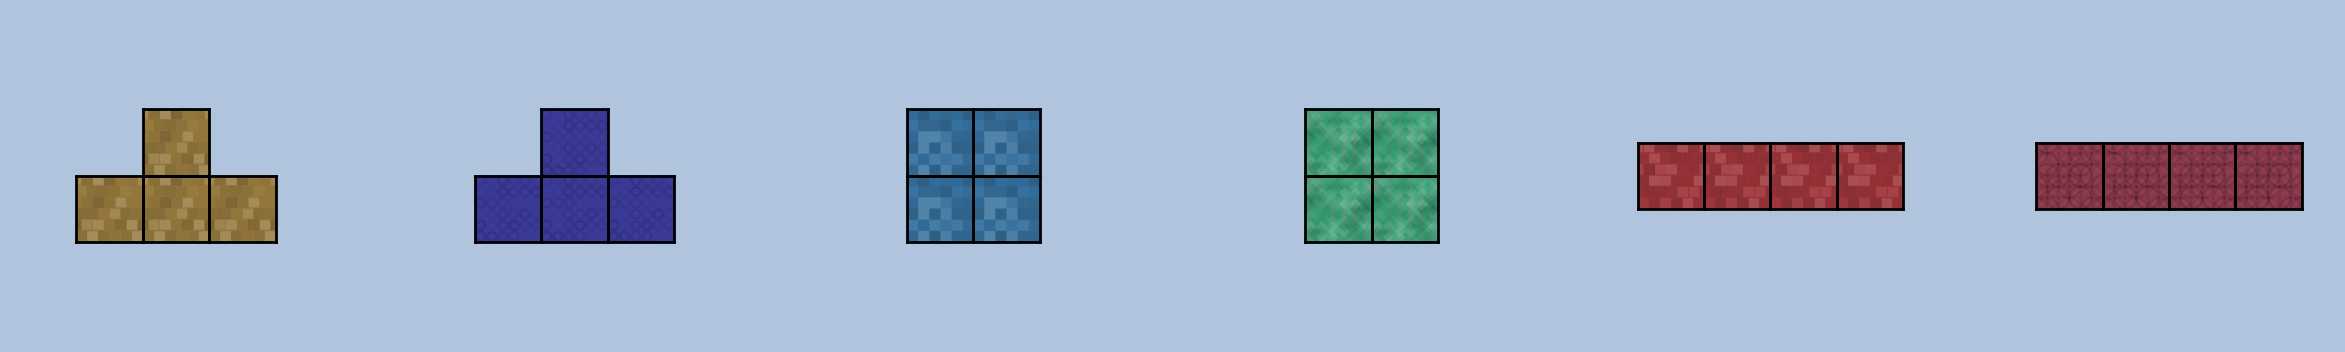

In [74]:

fig = draw_polyomino_set(blocks, 1, 6, texture_files)
fig.show()
plt.axis('off')
fig.patch.set_facecolor('lightsteelblue')
fig.savefig(f'../outputs/polys_0.png', bbox_inches='tight', pad_inches=0)
# plt.close()


In [76]:

for solve_ind in range(6):
    # board = board_dict[solve_ind]
    H, W = 8, 8
    board = (np.array(board) == 1).tolist()
    blocks, locations, rotations = cPickle.load(open(f"../outputs/generated_solution_{solve_ind}.pkl", "rb"))
    rotated_blocks = P.apply_rotations(blocks, rotations)

    fig = draw_packing_with_texture(rotated_blocks, locations, H, W, texture_files)
    fig.show()
    plt.axis('off')
    fig.patch.set_facecolor('lightsteelblue')
    fig.savefig(f'../outputs/logic/pbt_{solve_ind}.png', bbox_inches='tight', pad_inches=0)
    plt.close()

/tmp/ipykernel_3651957/14687627.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [80]:

for solve_ind in range(2, 3):
    # board = board_dict[solve_ind]
    H, W = 7, 7
    board = (np.array(board) == 1).tolist()
    blocks, locations, rotations = cPickle.load(open(f"../outputs/handcrafted_solution_{solve_ind}.pkl", "rb"))
    rotated_blocks = P.apply_rotations(blocks, rotations)

    fig = draw_packing_with_texture(rotated_blocks, locations, H, W, texture_files)
    fig.show()
    plt.axis('off')
    fig.patch.set_facecolor('lightsteelblue')
    fig.savefig(f'../outputs/logic/hc_{solve_ind}.png', bbox_inches='tight', pad_inches=0)
    plt.close()

/tmp/ipykernel_3651957/3154753507.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [159]:
# load the stabilities:

info_1 = cPickle.load(open("../stability_out/stability_scores_1.pkl", "rb"))
info_2 = cPickle.load(open("../stability_out/stability_scores_2.pkl", "rb"))


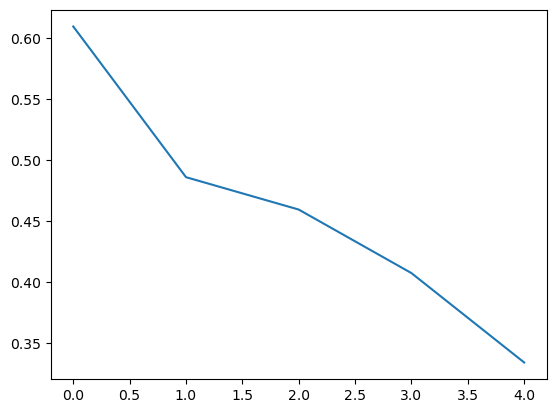

In [166]:
averages = []
for i in range(5):
    info = cPickle.load(open(f"../stability_out/stability_scores_{i}.pkl", "rb"))
    avg_score = np.mean(list(info[0].values()))
    averages.append(avg_score)
plt.plot(averages)
    

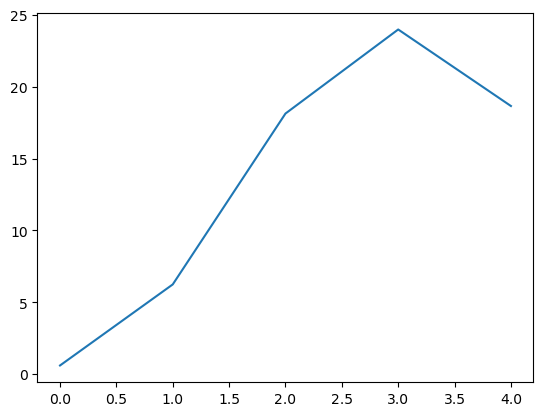

In [168]:
averages = []
for i in range(5):
    info = cPickle.load(open(f"../stability_out/stability_scores_{i}.pkl", "rb"))
    avg_score = np.mean(list(info[0].values()))
    averages.append(avg_score)
plt.plot(averages)
    

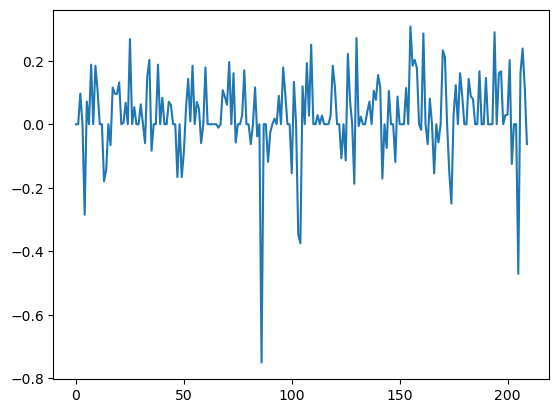

In [167]:
diff = []
for polys, score in info_1[0].items():
    difference = info_1[0][polys] - info_2[0][polys]
    diff.append(difference)
plt.plot(diff)